# Customer Support Ticket Classification using NLP

## 0. Introduction

This project aims to automate customer support ticket classification for a financial company using NLP techniques. The objective is to classify unstructured customer complaints into predefined categories to streamline the support process. The categories include:

- **Credit card/Prepaid card**
- **Bank account services**
- **Theft/Dispute reporting**
- **Mortgages/loans**
- **Others**

The notebook follows a structured workflow, encompassing the following major stages:

1. **Data Reading and Understanding**  
2. **Data Cleaning**  
3. **Text Preprocessing**  
4. **Exploratory Data Analysis (EDA)**  
5. **Feature Extraction**  
6. **Topic Modeling**  
7. **Model Building**  
8. **Best Model**  
9. **Model Inference**

The data provided is in **JSON format**, and it is efficiently loaded into a Pandas DataFrame for further processing.

## 1. Data Reading and Understanding


In this step, I will load the customer complaints data from a JSON file and perform an initial exploration to understand its structure and content. This will help me gain insights into the data distribution and prepare for subsequent preprocessing steps.

**Steps Involved**:
- Load the JSON file into a Pandas DataFrame.
- Examine the structure of the dataset by checking the columns and data types.

In [1]:
import re
import json
import pandas as pd
import numpy as np
from tabulate import tabulate

In [2]:
# Load the data
data = pd.json_normalize(json.load(open('./data/complaints-2021-05-14_08_16.json', encoding='ANSI')))

In [3]:
data.shape

(78313, 22)

In [4]:
data.head(4).T

,0,1,2,3
_index,complaint-public-v2,complaint-public-v2,complaint-public-v2,complaint-public-v2
_type,complaint,complaint,complaint,complaint
_id,3211475,3229299,3199379,2673060
_score,0.0,0.0,0.0,0.0
_source.tags,None,Servicemember,None,None
_source.zip_code,90301,319XX,77069,48066
_source.complaint_id,3211475,3229299,3199379,2673060
_source.issue,Attempts to collect debt not owed,Written notification about debt,"Other features, terms, or problems",Trouble during payment process
_source.date_received,2019-04-13T12:00:00-05:00,2019-05-01T12:00:00-05:00,2019-04-02T12:00:00-05:00,2017-09-13T12:00:00-05:00
_source.state,CA,GA,TX,MI


## 2. Data cleaning

Checking fir missing values

In [5]:
data.isnull().mean()*100 

_index                                0.000000
_type                                 0.000000
_id                                   0.000000
_score                                0.000000
_source.tags                         86.081493
_source.zip_code                      8.628197
_source.complaint_id                  0.000000
_source.issue                         0.000000
_source.date_received                 0.000000
_source.state                         2.542362
_source.consumer_disputed             0.000000
_source.product                       0.000000
_source.company_response              0.000000
_source.company                       0.000000
_source.submitted_via                 0.000000
_source.date_sent_to_company          0.000000
_source.company_public_response      99.994892
_source.sub_product                  13.498397
_source.timely                        0.000000
_source.complaint_what_happened       0.000000
_source.sub_issue                    59.117899
_source.consu

We do not really need all columns for the current task. Let's focus on following columns

```python
    [
        '_source.product', 
        '_source.sub_product', 
        '_source.complaint_what_happened'
    ]

In [6]:
data[['_source.product', '_source.sub_product', '_source.complaint_what_happened']].head().T

,0,1,2,3,4
_source.product,Debt collection,Debt collection,Credit card or prepaid card,Mortgage,Credit card or prepaid card
_source.sub_product,Credit card debt,Credit card debt,General-purpose credit card or charge card,Conventional home mortgage,General-purpose credit card or charge card
_source.complaint_what_happened,,Good morning my name is XXXX XXXX and I apprec...,I upgraded my XXXX XXXX card in XX/XX/2018 and...,,


In [7]:
data[['_source.product']].value_counts()

_source.product                                                             
Mortgage                                                                        22725
Checking or savings account                                                     12147
Credit card or prepaid card                                                     10797
Credit card                                                                     10373
Bank account or service                                                          9816
Credit reporting, credit repair services, or other personal consumer reports     4310
Debt collection                                                                  3201
Money transfer, virtual currency, or money service                               1500
Consumer Loan                                                                    1029
Vehicle loan or lease                                                             892
Student loan                                                   

In [8]:
data[['_source.sub_product']].value_counts()

_source.sub_product                       
Checking account                              17182
General-purpose credit card or charge card    10504
Other mortgage                                 8447
Conventional fixed mortgage                    4892
Credit reporting                               4172
                                              ...  
Government benefit payment card                   4
Gift or merchant card                             4
Medical debt                                      2
ID prepaid card                                   2
Electronic Benefit Transfer / EBT card            1
Name: count, Length: 72, dtype: int64

Based on the objective of automating the classification of customer complaints using NLP techniques, only the relevant columns required for topic modeling and supervised classification are selected. The selected columns are:

1. **`_source.complaint_what_happened`** – This column contains the actual complaint text provided by customers. It will serve as the primary input for topic modeling and classification.
2. **`_source.product`** – This column represents the main product category associated with the complaint. It will be used to assign labels to the complaints after topic modeling.
3. **`_source.sub_product`** – This column provides additional granularity regarding the product type, which can help refine the categorization if needed.

Let's drop all other columns and keep what we need

In [9]:
data = data[['_source.product', '_source.sub_product', '_source.complaint_what_happened']]
data.shape

(78313, 3)

In [10]:
data.isnull().mean()*100

_source.product                     0.000000
_source.sub_product                13.498397
_source.complaint_what_happened     0.000000
dtype: float64

We also observed `_source.complaint_what_happened` has blanks. Let's take closer look

In [11]:
data[data['_source.complaint_what_happened'] == '']

,_source.product,_source.sub_product,_source.complaint_what_happened
0,Debt collection,Credit card debt,
3,Mortgage,Conventional home mortgage,
4,Credit card or prepaid card,General-purpose credit card or charge card,
5,Checking or savings account,Checking account,
6,Checking or savings account,Checking account,
...,...,...,...
78304,Mortgage,Conventional home mortgage,
78305,Checking or savings account,Other banking product or service,
78306,Checking or savings account,Checking account,
78307,Mortgage,Conventional home mortgage,


In [12]:
data[data['_source.complaint_what_happened'] == ''].shape

(57241, 3)

We cannot really do anything with blank complains so we will be droppoing these rows.

In [13]:
data = data[data['_source.complaint_what_happened'] != ''].copy(deep=True)
data.shape

(21072, 3)

In [14]:
data.isnull().mean()*100

_source.product                     0.000000
_source.sub_product                10.008542
_source.complaint_what_happened     0.000000
dtype: float64

Renaming column to simpler names

In [15]:
data = data.rename(
    columns={
        '_source.product' : 'product',
        '_source.sub_product': 'sub_product',
        '_source.complaint_what_happened': 'complaint' 
    }
)

data.head(3).T

,1,2,10
product,Debt collection,Credit card or prepaid card,"Credit reporting, credit repair services, or o..."
sub_product,Credit card debt,General-purpose credit card or charge card,Other personal consumer report
complaint,Good morning my name is XXXX XXXX and I apprec...,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Chase Card was reported on XX/XX/2019. However...


In [16]:
data = data.reset_index()

In [17]:
data.shape

(21072, 4)

## 3: Text Preprocessing


To prepare the text data for topic modeling and classification, several preprocessing steps are applied to enhance the quality and reduce noise in the complaint text. The following steps have been implemented:

1. **Lowercasing:** - Standardizing the text by converting all words to lowercase.
2. **Removing punctuation and special characters:** - Cleaning the text by eliminating unnecessary symbols, numbers, and special characters.
3. **Tokenization and Stopword Removal:** - Splitting the text into individual words and removing common stopwords that do not add value to analysis.
4. **Lemmatization:** - Converting words to their root form to minimize vocabulary size while retaining meaning.
5. **POS Tagging and Filtering:** - Extracting only relevant parts of speech, such as:
     - **Nouns (NN, NNS)** – To retain key entities in complaints.
     - **Verbs (VB, VBD, VBG, VBN, VBP, VBZ)** – To capture actions.
     - **Adjectives (JJ, JJR, JJS)** – To retain descriptive elements. 

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy

In [19]:
# Download necessary NLTK resources if not already available
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [20]:
# Industry-specific terms to retain (normalized to lowercase for case-insensitive matching)
industry_terms = set(term.lower() for term in [

    # Credit card/Prepaid card
    "Credit Card", 
    "Credit Card statement", 
    "Credit Score", 
    "Credit Report", 
    "Credit Limit", 
    "Credit Line Increase", 
    "Credit Inquiry", 
    "Credit Freeze", 
    "Chargeback", 
    "Balance Transfer", 
    "Cash Advance", 
    "APR", 
    "Interest Rate", 
    "Chase Credit Card", 
    "Chase", 
    "autopay", 

    # Bank account services
    "savings",           
    "savings account",           
    "bank product service",           
    "JP Morgan Chase", 
    "J.P. Morgan Chase", 
    "Chase Bank", 
    "Chase Mortgage", 
    "JP Morgan", 
    "bank statement",
    "Checking Account", 
    "Savings Account", 
    "Money Market", 
    "Certificate of Deposit", 
    "Online Banking", 
    "Mobile Banking", 
    "Funds Availability", 
    "Account Closure", 
    "Account Freeze", 
    "Account Access", 
    "Statement Discrepancy", 

    # Theft/Dispute reporting
    "Fraud", 
    "Identity Theft", 
    "Unauthorized Transaction", 
    "Account Takeover", 
    "Phishing", 
    "Security Breach", 
    "Complaint", 
    "Dispute", 
    "Escalation", 
    "Debt Collection", 
    "Repossession", 
    "Collection Notice", 
    "Garnishment", 
    "Resolution", 
    "Service Outage", 

    # Mortgages/loans
    "Chase Auto", 
    "Home Loan", 
    "Auto Loan", 
    "Personal Loan", 
    "Student Loan", 
    "Consumer Loan", 
    "Business Loan", 
    "Mortgage Loan", 
    "Loan Refinancing", 
    "Loan Application", 
    "Loan Denial", 
    "Loan Modification", 
    "Debt Consolidation", 
    "Foreclosure", 
    "Property", 

    # Others
    "Late Fee", 
    "Scam", 
    "Transaction Fee", 
    "Overdraft", 
    "Payment Due", 
    "Returned Payment", 
    "Billing Statement", 
    "Minimum Payment", 
    "Autopay", 
    "ACH Transfer", 
    "Wire Transfer", 
    "Wire Fraud", 
    "Direct Deposit", 
    "Pending Transaction", 
    "Card Replacement", 
    "ATM Withdrawal", 
    "Lawsuit", 
    "Regulatory Compliance", 
    "Fair Credit Reporting Act", 
    "Consumer Financial Protection Bureau", 
    "Terms and Conditions", 
    "Rewards Program"
])


In [21]:
# Step 1: Text Cleanup
def clean_text(text: str) -> str:
    """
    Preprocess complaint text by applying lowercasing, removing special characters, 
    tokenizing, removing stopwords, and removing repeated words.

    Args:
        text (str): Input complaint text.

    Returns:
        str: Cleaned and processed text.
    """
    text = text.lower()  # Convert text to lowercase for uniformity

    # Fix slashes in dates (e.g., XX\/XX\/XXXX to XX/XX/XXXX)
    text = re.sub(r'\\/', '/', text)

    # Remove masked date formats like XX/XX/XXXX with or without spaces
    text = re.sub(r'\b[x]{2,}\s?/\s?[x]{2,}\s?/\s?\d{4}\b', '', text)
    text = re.sub(r'\b[x]{2,}/[x]{2,}/\d{2}\b', '', text)

    # Remove masked personal identifiers (e.g., XXXX XXXX XXXX XXXX)
    text = re.sub(r'[x]{2,}\s?[x]{2,}\s?[x]{2,}\s?[x]{2,}', '', text)

    # Remove monetary values (e.g., {$70.00})
    text = re.sub(r'\{\$\d{1,6}\.\d{2}\}', '', text)

    # Replace generic placeholders (e.g., XXXX) with an empty string
    text = re.sub(r'x{2,}', '', text)

    # Replace interest rates (e.g., 4.125 %)
    text = re.sub(r'\b\d+(\.\d+)?\s?%\b', '[INTEREST_RATE]', text)
    text = re.sub(r'\bAPR\s\d+(\.\d+)?\s?%\b', 'APR [INTEREST_RATE]', text)

    # Remove unwanted characters like dashes and special characters
    text = re.sub(r'(-\s?)+', '', text)
    text = re.sub(r'Claim number x{2,}', '', text)

    # Remove '[ name redacted ]' placeholders
    text = re.sub(r'\[ name redacted \]', '', text)

    # Remove non-alphanumeric characters and extra spaces
    text = re.sub(r'\\n', ' ', text)  # Remove new lines
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove multiple spaces

    # Remove repeated words (e.g., "card card card issue" -> "card issue")
    text = re.sub(r'\b(\w+)(?:[\s,;:/\\-]+\1\b)+', r'\1', text)

    return text

In [22]:
# Load spaCy English NLP model
nlp = spacy.load("en_core_web_sm")

# Define POS tags to retain (nouns, verbs, adjectives)
POS_TAGS_TO_KEEP = {'NN', 'NNS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'JJ', 'JJR', 'JJS'}

# Step 2: POS Tag Removal
def remove_unwanted_pos_tags(texts: pd.Series) -> pd.Series:
    """
    Retain specific POS tags (nouns, verbs, adjectives) while removing others.

    Args:
        texts (pd.Series): Series containing text data.

    Returns:
        pd.Series: Processed text with only selected POS tags retained.
    """
    processed_sentences = []

    for doc in nlp.pipe(texts, disable=['ner', 'parser']):  # Disable unnecessary components for efficiency
        filtered_words = [
            token.lemma_ if token.tag_ in POS_TAGS_TO_KEEP or token.text.lower() in industry_terms else ''
            for token in doc
        ]
        # Remove empty strings and reconstruct processed text
        processed_text = ' '.join([word for word in filtered_words if word])
        processed_sentences.append(processed_text)

    return pd.Series(processed_sentences)

In [23]:
lemmatizer = WordNetLemmatizer()

# Step 3: Lemmatization
def lemmatize_text(text: str) -> str:
    """
    Lemmatize text after tokenization and stopword removal.

    Args:
        text (str): Input text to be lemmatized.

    Returns:
        str: Lemmatized text.
    """
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Apply lemmatization

    return ' '.join(tokens)

In [24]:
# Step 1: Clean text
data['complaint_regex'] = data['complaint'].apply(clean_text)

In [25]:
# Step 2: POS Tag filtering
data['complaint_POS_Tag_Removed'] = remove_unwanted_pos_tags(data['complaint_regex'])

In [26]:
# Step 3: Lemmatization
data['complaint_cleaned'] = data['complaint_POS_Tag_Removed'].astype(str).apply(lemmatize_text)

In [27]:
# Removing occurrences of -PRON- from the complaint_POS_removed column added by lemmatization
# data['complaint_cleaned'] = data['complaint_cleaned'].str.replace('-PRON-', '')

`Some hard work`. Let's review complaints after clean up and iteratively improve the cleaning

In [28]:
data['complaint'].to_json('complaint1.json', indent=4)
data['complaint_regex'].to_json('complaint2.json', indent=4)
data['complaint_POS_Tag_Removed'].to_json('complaint3.json', indent=4)
data['complaint_cleaned'].to_json('complaint4.json', indent=4)

## 4: Exploratory Data Analysis (EDA)


In this step, we will analyze the preprocessed complaint text data to gain insights into its structure and content. The following analyses will be performed:

1. **Character Length Distribution**  
   - Visualizing the distribution of text lengths for the columns:  
     - `complaint`  
     - `complaint_cleaned`  
     - `complaint_POS_Tag_Removed`  

2. **Word Cloud Visualization**  
   - Generating a word cloud to visualize the top 40 most frequent words across all complaints after text processing.

3. **N-gram Analysis**  
   - Calculating and displaying the top 30 most frequent:  
     - **Unigrams (single words)**  
     - **Bigrams (two-word phrases)**  
     - **Trigrams (three-word phrases)**  
   - Printing the top 10 words for each case to observe patterns in the complaint text.


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

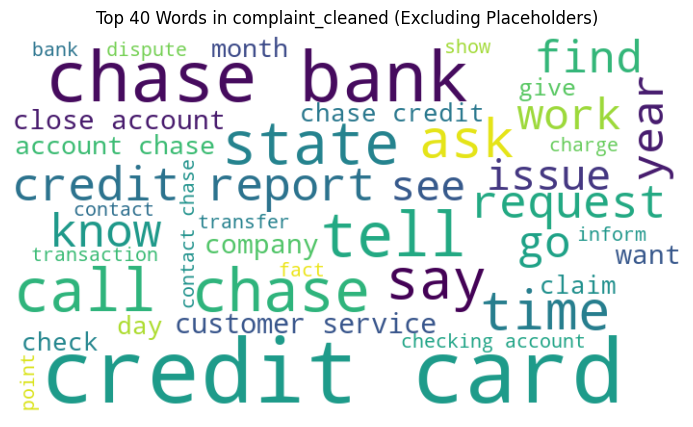

In [30]:
# Define words to exclude from the word cloud
exclude_words = {'redacted', 'amount', 'date', 'interest_rate', 'apr', 'claim_num'}

# Generate the word cloud excluding specific words
wordcloud = WordCloud(
    width=700, 
    height=400, 
    max_words=40, 
    background_color='white',
    stopwords=exclude_words,  # Exclude specified words
    random_state=42
).generate(' '.join(data['complaint_cleaned']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in complaint_cleaned (Excluding Placeholders)')
plt.show()

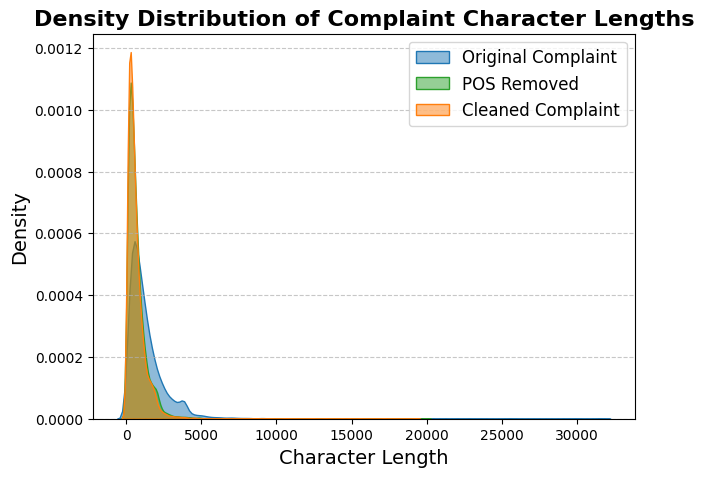

In [31]:
data['complaint_length'] = data['complaint'].astype(str).apply(len)
data['complaint_cleaned_length'] = data['complaint_cleaned'].astype(str).apply(len)
data['pos_removed_length'] = data['complaint_POS_Tag_Removed'].astype(str).apply(len)

plt.figure(figsize=(7, 5))
sns.kdeplot(data['complaint_length'], label='Original Complaint', fill=True, color="#1f77b4", alpha=0.5)
sns.kdeplot(data['pos_removed_length'], label='POS Removed', fill=True, color="#2ca02c", alpha=0.5)
sns.kdeplot(data['complaint_cleaned_length'], label='Cleaned Complaint', fill=True, color="#ff7f0e", alpha=0.5)

plt.title('Density Distribution of Complaint Character Lengths', fontsize=16, fontweight='bold')
plt.xlabel('Character Length', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text_series: pd.Series, n: int, top_k: int):
    """
    Extract and return the top-k most common n-grams from the given text data without dense conversion.

    Args:
        text_series (pd.Series): Series containing preprocessed text data.
        n (int): N-gram size (1 for unigram, 2 for bigram, 3 for trigram).
        top_k (int): Number of top n-grams to return.

    Returns:
        list: List of tuples containing the top n-grams and their frequencies.
    """
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_matrix = vectorizer.fit_transform(text_series.dropna())
    
    # Use sparse matrix sum to avoid converting to dense array
    ngram_counts = ngram_matrix.sum(axis=0)

    # Get feature names and their counts
    ngram_vocab = vectorizer.get_feature_names_out()
    ngram_freqs = [(ngram_vocab[idx], ngram_counts[0, idx]) for idx in range(ngram_counts.shape[1])]
    
    # Sort and return top K n-grams
    top_ngrams = sorted(ngram_freqs, key=lambda x: x[1], reverse=True)[:top_k]
    return top_ngrams

In [33]:
top_unigrams = get_top_ngrams(data['complaint_cleaned'], 1, 10)
print(tabulate(top_unigrams, headers=['Unigrams', 'Count'], showindex=True,))

    Unigrams      Count
--  ----------  -------
 0  chase         80947
 1  account       48639
 2  credit        34218
 3  card          30496
 4  call          26087
 5  bank          22559
 6  payment       21198
 7  tell          19668
 8  charge        18262
 9  receive       17735


In [34]:
top_bigrams = get_top_ngrams(data['complaint_cleaned'], 2, 10)
print(tabulate(top_bigrams, headers=['Bigrams', 'Count'], showindex=True,))

    Bigrams             Count
--  ----------------  -------
 0  credit card         12854
 1  chase bank           7535
 2  call chase           5262
 3  credit report        3966
 4  customer service     3063
 5  close account        2957
 6  chase credit         2800
 7  account chase        2790
 8  checking account     2518
 9  contact chase        2433


In [35]:
top_trigrams = get_top_ngrams(data['complaint_cleaned'], 3, 10)
print(tabulate(top_trigrams, headers=['Trigrams', 'Count'], showindex=True,))

    Trigrams                  Count
--  ----------------------  -------
 0  chase credit card          2378
 1  credit card account         977
 2  credit card company         964
 3  credit card chase           807
 4  chase customer service      596
 5  receive letter chase        571
 6  call customer service       544
 7  account chase bank          481
 8  inquiry credit report       436
 9  file police report          428


## 5: Feature Extraction

In this step, we will transform the processed complaint text into numerical representations using **TF-IDF (Term Frequency-Inverse Document Frequency)**. This transformation will convert textual data into a format suitable for machine learning models.

Steps to be followed:
1. Apply the TF-Idata vectorization to the `cleaned_complaint` column.
2. Convert text data into a sparse numerical matrix.
3. Save the transformed data for further processing.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Limit features to prevent memory overload
    stop_words='english',   # Remove common stopwords
    ngram_range=(1, 4),     # Use both unigrams and bigrams
    max_df=0.95,            # Ignore terms that appear in more than 95% of documents
    min_df=5                # Ignore terms that appear in less than 5 documents
)

# Apply TF-IDF transformation
X_tfidf = tfidf_vectorizer.fit_transform(data['complaint_cleaned'].dropna())

In [37]:
import pickle

# Save the feature matrix
with open('tfidf_features.pkl', 'wb') as feat_file:
    pickle.dump(X_tfidf, feat_file)

print("TF-IDF feature extraction completed. Saved the vectorizer and features for further processing.")

TF-IDF feature extraction completed. Saved the vectorizer and features for further processing.


## 6: Topic Modeling


In this step, we will apply **Non-Negative Matrix Factorization (NMF)** to the TF-IDF feature matrix obtained from the previous step. The goal of topic modeling is to identify key themes or topics within the customer complaints and categorize them into meaningful clusters.

Steps Involved:
1. Load the TF-IDF matrix and vectorizer.
2. Apply NMF with the number of topics set to 5 (as per the assignment instructions).
3. Extract the top words associated with each topic.
4. Assign a label to each complaint based on the highest topic weight.


In [38]:
from sklearn.decomposition import NMF

# Define the number of topics based on the assignment requirement
num_topics = 5

# Apply NMF for topic modeling
nmf_model = NMF(n_components=num_topics, random_state=42)
W = nmf_model.fit_transform(X_tfidf)  # Document-topic matrix
H = nmf_model.components_  # Topic-term matrix

# Assign each complaint to the most relevant topic
data['topic'] = np.argmax(W, axis=1)


In [39]:
# Function to display the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    """
    Retrieve the top words for each topic from the NMF model.

    Args:
        model: Trained NMF model
        feature_names: List of feature names from the TF-IDF vectorizer
        n_top_words: Number of top words to retrieve per topic

    Returns:
        dict: A dictionary with topic numbers as keys and top words as values
    """
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics[topic_idx] = top_words
    return topics

In [40]:
# Get feature names and top words per topic
feature_names = tfidf_vectorizer.get_feature_names_out()
top_words_per_topic = get_top_words(nmf_model, feature_names, 20)

# Prepare data for tabulation
table_top_word = [(topic, ', '.join(words)) for topic, words in top_words_per_topic.items()]

# Print the top words for each topic using tabulate
print(tabulate(table_top_word, headers=['Topic', 'Top Words'], tablefmt='grid'))

+---------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|   Topic | Top Words                                                                                                                                                                                                                                       |
+=========+=================================================================================================================================================================================================================================================+
|       0 | account, check, bank, chase, money, deposit, fund, close, tell, branch, open, say, chase bank, day, transaction, checking, transfer, claim, close account, number                                                                 

**Pre-defined topic labels**

- Bank account services,
- Credit card / Prepaid card,
- Mortgages / Loans,
- Theft / Dispute reporting,
- Others

Labelling the topic based on top keywords

In [41]:
import pickle

topic_labels_map = {
    0: "Bank account services",
    1: "Credit card / Prepaid card",
    2: "Mortgages / Loans",
    3: "Theft / Dispute reporting",
    4: "Others"
}

target_names = list(topic_labels_map.values())

data['topic_label'] = data['topic'].map(topic_labels_map)

with open('topic_labels_map.pkl', 'wb') as map_file:
    pickle.dump(topic_labels_map, map_file)

Summary of topic index, label and count with top keywords

In [42]:
topic_counts = data['topic'].value_counts().sort_index()
table_data = list(zip(
    topic_counts.index,
    topic_counts.values,
    [topic_labels_map.get(topic, "Unknown") for topic in topic_counts.index],
    [label for _ , label in table_top_word]
))
print(tabulate(table_data, headers=['Topic', 'Count', 'Label', 'Top Words'], tablefmt='grid', showindex=None))

+---------+---------+----------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|   Topic |   Count | Label                      | Top Words                                                                                                                                                                                                                                       |
+=========+=========+============================+=================================================================================================================================================================================================================================================+
|       0 |    5707 | Bank account services      | account, check, bank, chase, money, deposit, fund, close, tell, branch

### Review topic model against product mapping from original data

In [43]:
data['product'].value_counts()

product
Credit card or prepaid card                                                     5039
Checking or savings account                                                     4290
Mortgage                                                                        3246
Credit reporting, credit repair services, or other personal consumer reports    2087
Credit card                                                                     2070
Bank account or service                                                         1650
Debt collection                                                                  955
Money transfer, virtual currency, or money service                               797
Vehicle loan or lease                                                            403
Consumer Loan                                                                    240
Student loan                                                                     140
Money transfers                                          

In [44]:
# Define a mapping to group products into broader categories
product_grouping = {
    'Credit card or prepaid card'               : 'Credit card / Prepaid card',
    'Credit card'                               : 'Credit card / Prepaid card',
    'Prepaid card'                              : 'Credit card / Prepaid card',    
    'Checking or savings account'               : 'Bank account services',
    'Bank account or service'                   : 'Bank account services',
    'Mortgage'                                  : 'Mortgages / Loans',
    'Vehicle loan or lease'                     : 'Mortgages / Loans',
    'Consumer Loan'                             : 'Mortgages / Loans',
    'Student loan'                              : 'Mortgages / Loans',
    'Payday loan, title loan, or personal loan' : 'Mortgages / Loans',
    'Payday loan'                               : 'Mortgages / Loans',
    'Credit reporting, credit repair services, or other personal consumer reports'
                                                : 'Theft / Dispute reporting',
    'Credit reporting'                          : 'Theft / Dispute reporting',
    'Debt collection'                           : 'Theft / Dispute reporting',
    'Money transfer, virtual currency, or money service'
                                                : 'Others',
    'Money transfers'                           : 'Others',
    'Other financial service'                   : 'Others'
}

# Create a temporary grouped column for analysis without modifying the original dataframe
data_temp = data.copy()
data_temp['product_grouped'] = data_temp['product'].map(product_grouping).fillna('Others')

# Generate the cross-tabulation using the temporary grouped column
topic_product_crosstab = pd.crosstab(data_temp['topic_label'], data_temp['product_grouped'])

# Print the cross-tabulation with headers in GitHub table format
print(tabulate(
    tabular_data=topic_product_crosstab, 
    headers='keys', 
    tablefmt='github'
))


| topic_label                |   Bank account services |   Credit card / Prepaid card |   Mortgages / Loans |   Others |   Theft / Dispute reporting |
|----------------------------|-------------------------|------------------------------|---------------------|----------|-----------------------------|
| Bank account services      |                    4381 |                          403 |                  81 |      666 |                         176 |
| Credit card / Prepaid card |                     918 |                         4792 |                  15 |       60 |                         349 |
| Mortgages / Loans          |                     206 |                          304 |                3021 |       67 |                         534 |
| Others                     |                     333 |                          973 |                 772 |       67 |                         419 |
| Theft / Dispute reporting  |                     102 |                          644 |       

In [45]:
X_tfidf.shape

(21072, 5000)

## 7. Model building

In [46]:
from sklearn.model_selection import train_test_split

# Define features (TF-IDF transformed complaint text) and target (assigned topics)
X = X_tfidf         # tfidf_matrix contains the transformed complaint texts
y = data['topic']   # Target labels (topics)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Print the shape of the train and test splits
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (16857, 5000), Testing set size: (4215, 5000)


In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model_name, y_true, y_pred, y_pred_proba, target_names):
    """
    Evaluate the performance of a multi-class classification model.
    
    Parameters:
    - model_name (str): Name of the model being evaluated.
    - y_true (array-like): True labels.
    - y_pred (array-like): Predicted class labels.
    - y_pred_proba (array-like): Predicted probabilities for each class.
    - target_names (list): List of target class names.
    
    Returns:
    None (prints evaluation metrics)
    """
    print(f"{model_name} Performance")
    print("Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    # Generate confusion matrix with side labels
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrix_table = tabulate(
        tabular_data=conf_matrix, 
        headers=target_names, 
        showindex=target_names, 
        tablefmt="github"
    )

    print("Confusion Matrix:\n")
    print(conf_matrix_table)

    print()
    # Calculate ROC AUC score for multi-class classification using One-vs-Rest (OvR)
    try:
        roc_score = roc_auc_score(y_true, y_pred_proba, multi_class='ovr', average='macro')
        print(f"ROC AUC Score (OvR Macro-Averaged): {roc_score:.4f}")
    except ValueError as e:
        print(f"Could not calculate ROC AUC Score: {e}")

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

#### Logistic Regression Model



In [49]:
# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Predict on test set
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_log_reg_pob = log_reg_model.predict_proba(X_test)

# Evaluate model
evaluate_model(
    model_name="**Logistic Regression**",
    y_true=y_test,
    y_pred=y_pred_log_reg,
    y_pred_proba=y_pred_log_reg_pob,
    target_names=target_names
)

**Logistic Regression** Performance
Classification Report:

                            precision    recall  f1-score   support

     Bank account services       0.96      0.98      0.97      1142
Credit card / Prepaid card       0.95      0.99      0.97      1227
         Mortgages / Loans       0.97      0.95      0.96       826
 Theft / Dispute reporting       0.98      0.93      0.95       507
                    Others       0.99      0.91      0.95       513

                  accuracy                           0.96      4215
                 macro avg       0.97      0.95      0.96      4215
              weighted avg       0.96      0.96      0.96      4215

Confusion Matrix:

|                            |   Bank account services |   Credit card / Prepaid card |   Mortgages / Loans |   Theft / Dispute reporting |   Others |
|----------------------------|-------------------------|------------------------------|---------------------|-----------------------------|----------|
| Ba

#### Decision Tree Model

In [50]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_model.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test)
y_pred_dt_prob = dt_model.predict_proba(X_test)


# Evaluate model
evaluate_model(
    model_name="**Decision Tree**",
    y_true=y_test,
    y_pred=y_pred_dt,
    y_pred_proba=y_pred_dt_prob,
    target_names=target_names
)

**Decision Tree** Performance
Classification Report:

                            precision    recall  f1-score   support

     Bank account services       0.84      0.83      0.83      1142
Credit card / Prepaid card       0.84      0.85      0.84      1227
         Mortgages / Loans       0.82      0.80      0.81       826
 Theft / Dispute reporting       0.80      0.83      0.82       507
                    Others       0.76      0.76      0.76       513

                  accuracy                           0.82      4215
                 macro avg       0.81      0.81      0.81      4215
              weighted avg       0.82      0.82      0.82      4215

Confusion Matrix:

|                            |   Bank account services |   Credit card / Prepaid card |   Mortgages / Loans |   Theft / Dispute reporting |   Others |
|----------------------------|-------------------------|------------------------------|---------------------|-----------------------------|----------|
| Bank acc

#### Random Forest Model

In [51]:
# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200, 
    criterion='entropy',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_prob = rf_model.predict_proba(X_test)

# Evaluate model
evaluate_model(
    model_name="**Random Forest**",
    y_true=y_test,
    y_pred=y_pred_rf,
    y_pred_proba=y_pred_rf_prob,
    target_names=target_names
)

**Random Forest** Performance
Classification Report:

                            precision    recall  f1-score   support

     Bank account services       0.86      0.94      0.90      1142
Credit card / Prepaid card       0.85      0.94      0.89      1227
         Mortgages / Loans       0.92      0.87      0.89       826
 Theft / Dispute reporting       0.95      0.86      0.90       507
                    Others       0.94      0.68      0.79       513

                  accuracy                           0.88      4215
                 macro avg       0.90      0.86      0.88      4215
              weighted avg       0.89      0.88      0.88      4215

Confusion Matrix:

|                            |   Bank account services |   Credit card / Prepaid card |   Mortgages / Loans |   Theft / Dispute reporting |   Others |
|----------------------------|-------------------------|------------------------------|---------------------|-----------------------------|----------|
| Bank acc

#### Naive Bayes Model

In [52]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test)
y_pred_nb_prob = nb_model.predict_proba(X_test)

# Evaluate model
evaluate_model(
    model_name="**Naive Bayes**",
    y_true=y_test,
    y_pred=y_pred_nb,
    y_pred_proba=y_pred_nb_prob,
    target_names=target_names
)

**Naive Bayes** Performance
Classification Report:

                            precision    recall  f1-score   support

     Bank account services       0.86      0.93      0.89      1142
Credit card / Prepaid card       0.86      0.91      0.88      1227
         Mortgages / Loans       0.89      0.88      0.89       826
 Theft / Dispute reporting       0.91      0.82      0.86       507
                    Others       0.86      0.67      0.76       513

                  accuracy                           0.87      4215
                 macro avg       0.88      0.84      0.86      4215
              weighted avg       0.87      0.87      0.87      4215

Confusion Matrix:

|                            |   Bank account services |   Credit card / Prepaid card |   Mortgages / Loans |   Theft / Dispute reporting |   Others |
|----------------------------|-------------------------|------------------------------|---------------------|-----------------------------|----------|
| Bank accou

## 8. Best model

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tabulate import tabulate

def compare_models(y_true, model_predictions, sort_by="F1-score"):
    """
    Compare multiple classification models based on evaluation metrics.

    Parameters:
    - y_true (array-like): True labels.
    - model_predictions (dict): Dictionary with model names as keys and 
                                tuples of (predicted labels, predicted probabilities).
    - sort_by (str): Metric to sort the results by ('F1-score', 'Accuracy', 'Recall', 
                        'Precision', 'ROC AUC', 'Confidence').

    Returns:
    - None (prints comparative table using tabulate)
    """

    # Define metric calculation functions
    metric_functions = {
        "Accuracy": lambda yt, yp: accuracy_score(yt, yp),
        "Precision": lambda yt, yp: precision_score(yt, yp, average='weighted'),
        "Recall": lambda yt, yp: recall_score(yt, yp, average='weighted'),
        "F1-score": lambda yt, yp: f1_score(yt, yp, average='weighted'),
        "ROC AUC": lambda yt, yp_prob: roc_auc_score(yt, yp_prob, multi_class='ovr', average='macro'),
        "Confidence": lambda yt, yp_prob: np.mean(np.max(yp_prob, axis=1))
    }

    # Collect model results
    results = []
    for model_name, (y_pred, y_pred_proba) in model_predictions.items():
        model_result = {"Model": model_name}
        for metric_name, func in metric_functions.items():
            if metric_name in ["ROC AUC", "Confidence"]:
                score = func(y_true, y_pred_proba)
            else:
                score = func(y_true, y_pred)
            model_result[metric_name] = round(score, 4)
        results.append(model_result)

    # Convert to DataFrame for sorting
    results_df = pd.DataFrame(results)

    # Validate sorting metric
    if sort_by not in metric_functions.keys():
        raise ValueError(f"Invalid sort_by value. Choose from: {list(metric_functions.keys())}")

    # Add * to the column being sorted
    results_df.rename(columns={sort_by: f"{sort_by}*"}, inplace=True)

    # Sort by the chosen metric in descending order
    results_df = results_df.sort_values(by=f"{sort_by}*", ascending=False)

    # Print the results using tabulate
    print(tabulate(
        tabular_data=results_df, 
        headers="keys", 
        tablefmt="github", 
        showindex=False,
        floatfmt=".4f"
    ))

    # Print footer indicating the sorting criterion
    print(f"\n*sorted by {sort_by}")

In [54]:
model_predictions = {
    "Random Forest": (y_pred_rf, y_pred_rf_prob),
    "Decision Tree": (y_pred_dt, y_pred_dt_prob),
    "Logistic Regression": (y_pred_log_reg, y_pred_log_reg_pob),
    "Naive Bayes" : (y_pred_nb, y_pred_nb_prob)
}

In [55]:
compare_models(
    y_true=y_test,
    model_predictions=model_predictions,
    sort_by="F1-score"
)

| Model               |   Accuracy |   Precision |   Recall |   F1-score* |   ROC AUC |   Confidence |
|---------------------|------------|-------------|----------|-------------|-----------|--------------|
| Logistic Regression |     0.9618 |      0.9624 |   0.9618 |      0.9617 |    0.9987 |       0.8623 |
| Random Forest       |     0.8849 |      0.8894 |   0.8849 |      0.8831 |    0.9899 |       0.6782 |
| Naive Bayes         |     0.8705 |      0.8712 |   0.8705 |      0.8685 |    0.9830 |       0.7967 |
| Decision Tree       |     0.8204 |      0.8204 |   0.8204 |      0.8203 |    0.8831 |       1.0000 |

*sorted by F1-score


In [56]:
import pickle

with open('log_reg_model.pkl', 'wb') as model_file:
    pickle.dump(log_reg_model, model_file)

#### Summary of performance:

1. **Logistic Regression:**  
   - This model demonstrates the best overall performance with the highest accuracy, precision, recall, and F1-score, indicating it balances false positives and false negatives well.  
   - The high ROC AUC suggests excellent discriminative ability, and the confidence level shows that the model is relatively reliable.

2. **Random Forest:**  
   - While it performs well in terms of accuracy and ROC AUC, its precision and recall are lower compared to logistic regression, indicating it might struggle with classifying some instances correctly.  
   - The confidence level is lower, suggesting more uncertainty in its predictions.

3. **Naive Bayes:**  
   - This model performs reasonably well but shows a slight trade-off in precision and recall, indicating it might make more false positive errors.  
   - The lower confidence compared to logistic regression suggests it may not generalize as effectively.

4. **Decision Tree:**  
   - It has the lowest performance across all metrics, highlighting a tendency to overfit the data, leading to lower generalization capability.  
   - The highest confidence indicates it makes firm predictions, but they might not always be accurate, making it less reliable overall.

## 9. Model Inference 

In [57]:
import pickle

# Load the feature matrix
with open('tfidf_features.pkl', 'rb') as feat_file:
    X_tfidf = pickle.load(feat_file)

# Load the logistic model
with open('log_reg_model.pkl', 'rb') as model_file:
    log_reg_model = pickle.load(model_file)

# Load the mapping
with open('topic_labels_map.pkl', 'rb') as map_file:
    topic_labels_map = pickle.load(map_file)

In [58]:
custom_complaints = [
    {"complaint": "I was charged an overdraft fee even though I had enough money in my account."},
    {"complaint": "My credit card application got denied without any explanation!"},
    {"complaint": "I noticed an unauthorized transaction on my account that I did not make."},
    {"complaint": "The bank closed my account without informing me and now I can't access my funds. This has been a nightmare for me as I have automatic payments scheduled and no access to my savings. The customer service team has not been helpful in resolving my issue."},
    {"complaint": "I applied for a loan and it's been weeks with no response from the bank."},
    {"complaint": "My mortgage interest rate suddenly increased, and I was not notified. I found out when my monthly payment shot up significantly, and it's putting me in a financial crisis. I have tried reaching out to my loan officer, but there has been no response from their end."},
    {"complaint": "I set up autopay for my credit card, but the payment didn't go through and I was charged a late fee."},
    {"complaint": "I'm being harassed by debt collectors for a debt I already paid off."},
    {"complaint": "The customer service representatives are always rude and never solve my issues."},
    {"complaint": "I reported identity theft, but the bank hasn't taken any action yet. I have sent multiple emails, and every time I call, they say my case is under review. Meanwhile, I continue to receive unauthorized transactions on my account."},
    {"complaint": "My credit report has incorrect information, and I can't get it fixed."},
    {"complaint": "I tried to transfer money to another account, but the transaction keeps failing."},
    {"complaint": "The mobile banking app keeps crashing, and I can't check my balance."},
    {"complaint": "I made a payment, but it hasn't reflected on my credit card statement yet."},
    {"complaint": "My credit limit was reduced without any reason, and it affected my credit score."},
    {"complaint": "I requested a new debit card weeks ago, and I still haven't received it."},
    {"complaint": "The loan officer promised a lower interest rate, but my final loan terms were different."},
    {"complaint": "I was charged a foreign transaction fee even though I was told my card had no such fees."},
    {"complaint": "I disputed a charge on my credit card, but they ruled in the merchant's favor without reviewing my case. I provided all the necessary documents and proofs to show that I did not authorize the charge, but I am still being held responsible for the amount."},
    {"complaint": "I paid off my student loan, but it's still showing as unpaid on my credit report. This has caused a dip in my credit score, and now I am facing issues with getting approval for a new mortgage. Despite multiple attempts to rectify this, it remains unresolved."}
]

In [59]:
def preprocess_custom_complaints(complaints):
    complaints_cleaned = complaints.apply(clean_text)                   # Step 1: Cleaning
    complaints_filtered = remove_unwanted_pos_tags(complaints_cleaned)  # Step 2: POS Tag Removal
    complaints_final = complaints_filtered.apply(lemmatize_text)        # Step 3: Lemmatization
    return complaints_final

In [60]:
complaints = pd.DataFrame(custom_complaints)
complaints

,complaint
0,I was charged an overdraft fee even though I h...
1,My credit card application got denied without ...
2,I noticed an unauthorized transaction on my ac...
3,The bank closed my account without informing m...
4,I applied for a loan and it's been weeks with ...
5,"My mortgage interest rate suddenly increased, ..."
6,"I set up autopay for my credit card, but the p..."
7,I'm being harassed by debt collectors for a de...
8,The customer service representatives are alway...
9,"I reported identity theft, but the bank hasn't..."


In [61]:
complaints['complained_cleaned'] = preprocess_custom_complaints(complaints=complaints['complaint'])

In [62]:
X_custom_tfidf = tfidf_vectorizer.transform(complaints['complained_cleaned'])
predicted_topics = log_reg_model.predict(X_custom_tfidf)
predicted_labels = [topic_labels_map[topic] for topic in predicted_topics]

In [63]:
# Prepare data for tabulated display
results = list(zip(predicted_labels, complaints['complaint']))

# Print formatted results
print(tabulate(results, headers=['Predicted Topic', 'Complaint'], tablefmt='github'))

| Predicted Topic            | Complaint                                                                                                                                                                                                                                                                |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Bank account services      | I was charged an overdraft fee even though I had enough money in my account.                                                                                                                                                                                             |
| Credit card / Prepaid card | My credit card application got denied without any explanation!             